# Data Cleaning in Python

In order for the data to be useful, the data has to be cleaned to remove missing data, irregular data (outliers), unnecessary data (duplicates), and inconsistent (capitalization, addresses). After cleaning the data, a machine learning model or any statistical model can be used to derive insights from data.

>Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting or a data quality firewall.

Python provides some handy functions that can be used to clean data.

## 1. Handling missing data

The first thing that needs to be done is loading in the libraries and datasets. I will be using the dataset of building permits issued in San Francisco.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
sf_permits = pd.read_csv("../input/building-permit-applications-data/Building_Permits.csv")

# set seed for reproducibility
np.random.seed(0)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1.1 Missing Data Points

Look for any any missing values, which is represented with ```NaN``` or ```None```.

In [2]:
sf_permits.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,...,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


As there are some missing values, the number of missing value in each column is:

In [3]:
# get the number of missing data points per column
missing_values_count = sf_permits.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

There is a lot of missing data. Getting a percentage of missing values in the dataset can be a better way to get a sense of the scale of the problem.

In [4]:
# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

26.26002315058403

More than a quarter of the values in the cells are missing.

### 1.2 Figure out why data is missing

Now is the time for "data intuition". "Data Intuition" is the part where we look at the data and try to figure out why the data is missing and how it will affect the analysis. One of the most important question we can ask to help figure this out is:

##### Is this value missing becuase it wasn't recorded or becuase it dosen't exist?

In [5]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

By looking at the [documentation](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data), ```Street Number Suffix``` has a lot of missing values. It is probably because the value doesn't exist as most street number won't have a suffix.

If you're doing very careful data analysis, this is the point at which you'd look at each column individually to figure out the best strategy for filling those missing values. For the rest of the process, we'll cover some "quick and dirty" techniques that can help you with missing values but will probably also end up removing some useful information or adding some noise to your data.

### 1.3 Drop missing values

If you are in a hurry or don't have a reason to figure out why your values are missing, one option is to just remove any rows or columns that contain missing values. (Not recommended for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know the dataset.)

If you surely want to drop rows with missing values, pandas does have a handy function, ```dropna()``` to help do this.

In [6]:
# remove all the rows that contain a missing value
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Every row in the dataset had at least one missing value, hence all the data was removed. It seems more reasonable to remove all the columns that have at least one missing value instead.

In [7]:
# remove all columns with at least one missing value
columns_with_na_dropped = sf_permits.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


Now look at how much data has been lost.

In [8]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


Although a lot of data has been lost, all the ```NaN's``` from the data has been successfully removed.

Another option is to try and fill in the missing values. For this subset a small sub-section of the ```sf_permits``` data so that it will print well.

### 1.4 Filling in missing values automatically

In [9]:
# get a small subset of the NFL dataset
subset_sf_data = sf_permits.loc[:, 'Permit Number':'Street Suffix'].head()
subset_sf_data

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St


Use the Panda's ```fillna()``` function to fill in missing values in a dataframe. One option is to specify what we want the ```NaN``` values to be replaced with. Here, replace all the ```NaN``` values with 0.

In [10]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_sf_data.fillna(method = 'bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0.0,Ellis,St
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0.0,Geary,St
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0.0,Pacific,Av
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0.0,Pacific,Av
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0.0,Market,St


It would make a lot more sense to replace missing values with whatever value comes directly after it in the same column (more applicable for observations that have some sort of logical order to them).

In [11]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_sf_data.fillna(method = 'bfill', axis=0).fillna(0)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0.0,Ellis,St
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0.0,Geary,St
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0.0,Pacific,Av
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0.0,Pacific,Av
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0.0,Market,St


Filling in missing values is known as "imputation". Now atleast the data has got some structure and some python can be used to extract the values.

## 2. Scaling and Normalization

Scaling and normalization are used to transform the data in order to derive specific helpful properties. In scaling, the *range* of the data is being changed while in normalization, the *shape of the distribution* of the data is being changed.

Load the libraries and the dataset to be used.

In [12]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

### 2.1 Scaling

Scaling is transforming the  data so that it fits within a specific scale, like 0-100 or 0-1. Comparision of variables on equal footing can be done after scaling the variables.

/opt/conda/lib/python3.7/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

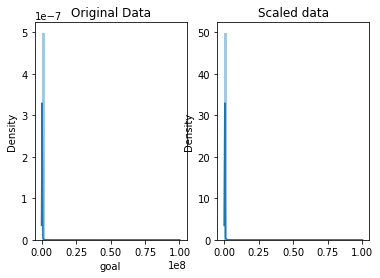

In [13]:
# select the usd_goal_real column
usd_goal = kickstarters_2017.goal

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(kickstarters_2017.goal, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

So scaling has infact changed the scales of the plots from 5 to 50 (but not the shape of the data: looks like most campaigns had small goals but a few have very large ones)

### 2.2 Normalization

Normalization is a more radical transformation wherein the observations are changed so that they can be described as a normal distribution.

> **[Normal distribution:](https://en.wikipedia.org/wiki/Normal_distribution)** Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, normalization of data only needs to be done when machine learning or statistics technique are to be used on the dataset. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (any method with "Gaussian" in the name probably assumes normality.)

The method used to normalize data here is the [Box-Cox Transformation](https://en.wikipedia.org/wiki/Power_transform).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

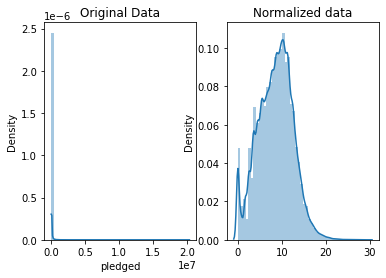

In [14]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Although it's not perfect (it looks like a lot pledges got very few pledges), it is much closer to normal!

### 3. Parsing

Data parsing is a process in which a string of data is converted from one format to another. In short, a data parse program is used for converting unstructured data into JSON, CSV, and other file formats and adds structure to said information.

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [15]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

As we'll be working with the "Date" column from the earthquakes dataframe, let's investigate this column now, does it look like it contains dates? What is the dtype of the column?

### 3.1 Check the date type for the "Date" column

For this part, I'll be working with the ```date``` column from the ```earthquakes``` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [16]:
# print the first few rows of the date column
print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


Yep, those are dates! As a human, I can tell that these are dates. But that doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of ```head()```, you can see that it says that the data type of this column is "object".

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

On checking the pandas dtype documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html), you'll notice that there's also a specific ```datetime64``` dtypes. Because the dtype of our column is ```object``` rather than ```datetime64```, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [17]:
# check the data type of our date column
earthquakes['Date'].dtype

dtype('O')

### 3.2 Convert the Date Columns to Date Time

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year". However, the entry at index 3378 follows a completely different pattern.

In [18]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


It appears to be an issue with data entry: ideally, all entries in the column have the same format. By checking the length of each entry in the "Date" column, we can get an idea of how widespread this issue is.

In [19]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

It appears as though there are two more rows that has a date in a different format. Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [20]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


Let's create a new column "date_parsed" in the earthquakes dataset that has correctly parsed dates in it. Without removing any rows from the dataset, the entries in the "Date" and "Time" column can be amended.

In [21]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

Now that our dates are parsed correctly, we can interact with them in useful ways.

### 3.3 Select the day of the month

Create a Pandas Series ```day_of_month_earthquakes``` containing the day of the month from the "date_parsed" column.

In [22]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

In [23]:
# print the first few rows
earthquakes['date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

### 3.4 Plot the day of the month to check the date parsing

Plot the days of the months from the earthquake dataset. Mixing up the months and days is always a possibility while parsing data. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

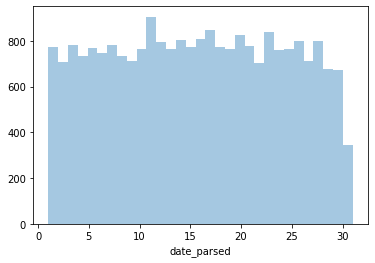

In [24]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me.

## 4. Character Encoding

Character encoding is the process of assigning numbers to graphical characters, especially the written characters of human language, allowing them to be stored, transmitted, and transformed using digital computers. 

The first thing we'll need to do is load in the libraries we'll be using.

In [25]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

### 4.1 What are encodings?

In [26]:
# start with a string
before = "This is the word 'namaste' written in hindi: नमस्ते"

# check to see what datatype it is
type(before)

str

Human-readable text (like "hi") are mapped from raw binary byte strings (that look like this: 0110100001101001). All of these is achieved by a specific set of rules that is chararcter encoding. There are many different encodings, and if you tried to read in text with a different encoding that the one it was originally written in, you end up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. These are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one you need to know is UTF-8.

>UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

It was pretty hard to deal with encodings in Python 2, but thankfully in Python 3 it's a lot simpler. (Kaggle Kernels only use Python 3.) There are two main data types you'll encounter when working with text in Python 3. One is is the string, which is what text is by default.

The other data is the [bytes](https://docs.python.org/3.1/library/functions.html#bytes) data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [27]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that the namaste word has been replaced with some mojibake that looks like "\xe0\xa4\xa8\xe0\xa4\xae\xe0\xa4\xb8\xe0\xa5\x8d\xe0\xa4\xa4\xe0\xa5\x87" when it's printed as if it were an ASCII string.

In [28]:
# take a look at what the bytes look like
after

b"This is the word 'namaste' written in hindi: \xe0\xa4\xa8\xe0\xa4\xae\xe0\xa4\xb8\xe0\xa5\x8d\xe0\xa4\xa4\xe0\xa5\x87"

However, when we try to use a different encoding to map our bytes into a string, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

In [29]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the word 'namaste' written in hindi: नमस्ते


However, when we try to use a different encoding to map our bytes into a string, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

In [30]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe0 in position 45: ordinal not in range(128)

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

For example, if we try to convert a string to bytes for ascii using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it should have been. That means we may have just made our data unusable!

In [31]:
# start with a string
before = "This is the word 'namaste' written in hindi: नमस्ते"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the word 'namaste' written in hindi: ??????


This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files.

### 4.2 Reading in files with encoding problem

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes files are also encoded in 'ASCII' and 'Widows-1252' format.

In [32]:
# read in the file with the encoding detected by chardet
police_killings = pd.read_csv("../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding='Windows-1252')

# look at the first few lines
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### 4.3 Saving files with UTF-8 encoding

Save a version of the police killings dataset to CSV. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [33]:
police_killings.to_csv("my_file.csv")

## 5. Inconsistent Data Entry

Tabular data often have misspelt words and duplicate words which need to removed in order to have a clean data.

The first thing we'll need to do is load in the libraries we'll be using.

In [34]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

Check out what the encoding of ```PakistanSuicideAttacks Ver 11 (30-November-2017).csvfile``` should be in using the ```chardet``` command.

In [35]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/pakistansuicideattacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


And then read the file in with the correct encoding.

In [36]:
# read in our data
suicide_attacks = pd.read_csv("../input/pakistansuicideattacks/PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

Take a moment to look at the data and get familiar with it.

### 5.1 Preliminary text processing

I'm interested in cleaning up the "Province" column to make sure there's no data entry inconsistencies in it. We could go through and check each row by hand, of course, and hand-correct inconsistencies when we find them. There's a more efficient way to do this though!

In [37]:
# get all the unique values in the 'Province' column
provinces = suicide_attacks['Province'].unique()

# sort them alphabetically and then take a closer look
provinces.sort()
provinces

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

Just looking at this, I can see some problems due to inconsistent data entry: 'Balochistan' and 'Baluchistan', for example.

The first thing I'm going to do is make everything lower case (I can change it back at the end if I like) and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data and you can fix a good 80% of your text data entry inconsistencies by doing this.

In [38]:
# convert to lower case
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
# remove trailing white spaces
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

### 5.2 Using fuzzy match to correct inconsistent data entry

Alright, let's take another look at the province column and see if there's any more data cleaning we need to do.

In [39]:
# get all the unique values in the 'City' column
provinces = suicide_attacks['Province'].unique()

# sort them alphabetically and then take a closer look
provinces.sort()
provinces

array(['ajk', 'balochistan', 'baluchistan', 'capital', 'fata', 'kpk',
       'punjab', 'sindh'], dtype=object)

It does look like there are some remaining inconsistencies: 'balochistan' and 'baluchistan' should probably be the same.

I'm going to use the [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy) package to help identify which string are closest to each other. This dataset is small enough that we could probably could correct errors by hand, but that approach doesn't scale well. (Would you want to correct a thousand errors by hand? What about ten thousand? Automating things as early as possible is generally a good idea. Plus, it’s fun! :)

>Fuzzy matching: The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another. So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o"). You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

Fuzzywuzzy returns a ratio given two strings. The closer the ratio is to 100, the smaller the edit distance between the two strings. Here, we're going to get the ten strings from our list of cities that have the closest distance to "balochistan".

In [40]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("balochistan", provinces, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('balochistan', 100),
 ('baluchistan', 91),
 ('capital', 44),
 ('fata', 40),
 ('sindh', 25),
 ('ajk', 14),
 ('punjab', 12),
 ('kpk', 0)]

We can see that two of the items in the provinces are very close to "balcohistan": "balochistan" and "balcuhistan". Let's replace all rows in our Province column that have a ratio of > 90 with "balochistan".

To do this, I'm going to write a function. (It's a good idea to write a general purpose function you can reuse if you think you might have to do a specific task more than once or twice. This keeps you from having to copy and paste code too often, which saves time and can help prevent mistakes.)

In [41]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

Now that we have a function, we can put it to the test!

In [42]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=suicide_attacks, column='Province', string_to_match="Balochistan")

All done!


And now let's can check the unique values in our Province column again and make sure we've tidied up balochistan correctly.

In [43]:
# get all the unique values in the 'City' column
provinces = suicide_attacks['Province'].unique()

# sort them alphabetically and then take a closer look
provinces.sort()
provinces

array(['Balochistan', 'ajk', 'capital', 'fata', 'kpk', 'punjab', 'sindh'],
      dtype=object)

Excellent! Now we only have "balochistan" in our dataframe and we didn't have to change anything by hand.